In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [3]:
data = np.genfromtxt("../로그 데이터/NU-MineBench.csv", delimiter="\n", skip_header=1, dtype=np.int64).copy()
data

array([105950216192, 105943924736, 105946021888, ..., 103563653120,
       103565225984, 103560867840], dtype=int64)

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.25, shuffle=False)
train_set, test_set

(array([105950216192, 105943924736, 105946021888, ..., 103591809024,
        103591813120, 103591817216], dtype=int64),
 array([103591821312, 103591825408, 103591829504, ..., 103563653120,
        103565225984, 103560867840], dtype=int64))

In [5]:
delta = np.array([train_set[i+1] - train_set[i] for i in range(int(len(train_set))-1)])
delta, len(delta)

(array([-6291456,  2097152, -6148096, ...,     4096,     4096,     4096],
       dtype=int64),
 47982)

In [6]:
data_counts = pd.Series(data=delta.T).value_counts()
data_counts

 4096       46769
-6291456      517
 2097152      511
 0            138
-8384512       42
-6289408        1
-6148096        1
-6309168        1
 1971504        1
-2048           1
dtype: int64

In [7]:
def category_by_threshold(data_counts, threshold, sign="over"):
    if sign == "under":
        category = (data_counts < threshold)
    else:
        category = (data_counts > threshold)
    return category.index[category == True]

In [8]:
def tokenizer(data, category, oov=-1):
    data = data.copy()
    mask = np.isin(data, category)
    data[mask == False] = oov
    return data

In [9]:
threshold = 100
category_over_threshold = category_by_threshold(data_counts, threshold)
category_over_threshold

Int64Index([4096, -6291456, 2097152, 0], dtype='int64')

In [10]:
tokenized_data = tokenizer(delta, category_over_threshold.to_numpy(), oov=-1)
tokenized_data

array([-6291456,  2097152,       -1, ...,     4096,     4096,     4096],
      dtype=int64)

In [11]:
tokenized_data_counts = pd.Series(data=tokenized_data.T).value_counts()
tokenized_data_counts

 4096       46769
-6291456      517
 2097152      511
 0            138
-1             47
dtype: int64

In [12]:
test_delta = np.array([test_set[i+1] - test_set[i] for i in range(int(len(test_set))-1)])
test_delta

array([    4096,     4096,     4096, ..., -4751360,  1572864, -4358144],
      dtype=int64)

In [13]:
tokenized_test_data = tokenizer(test_delta, category_over_threshold.to_numpy(), oov=-1)
tokenized_test_data

array([4096, 4096, 4096, ...,   -1,   -1,   -1], dtype=int64)

In [14]:
tokenized_test_data_counts = pd.Series(data=tokenized_test_data.T).value_counts()
tokenized_test_data_counts

 4096       10351
-1           5502
 0            135
-6291456        3
 2097152        3
dtype: int64

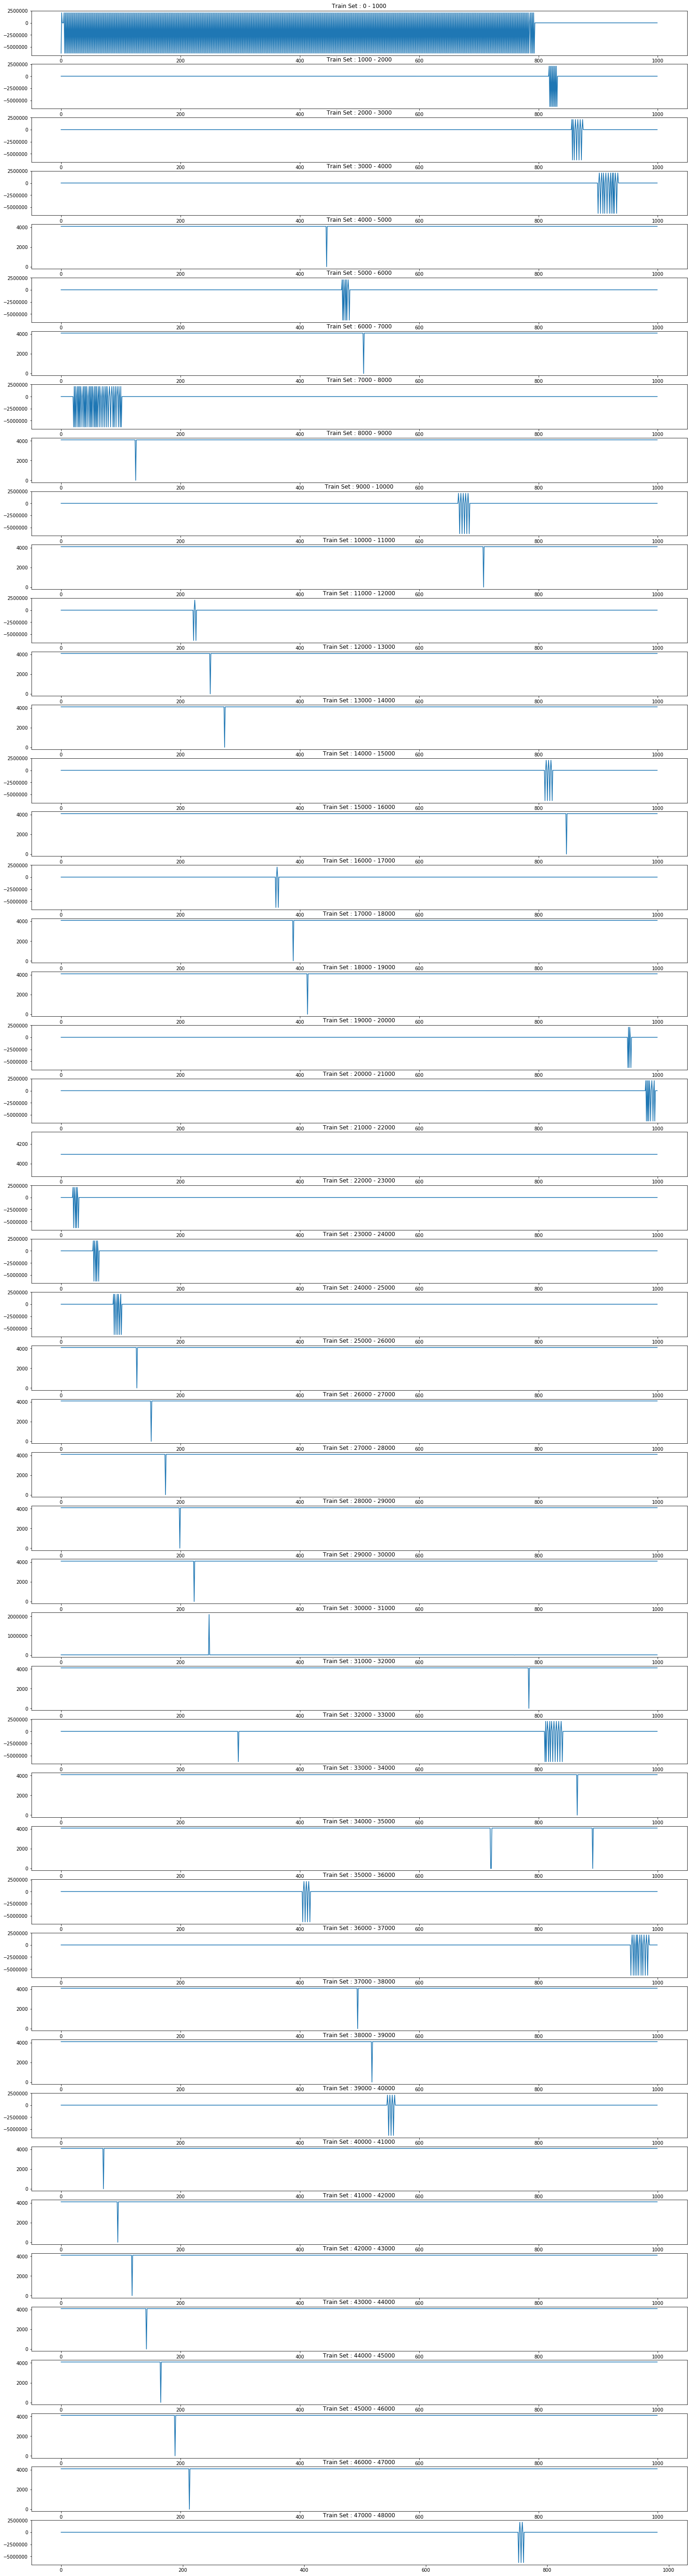

In [15]:
plt.figure(figsize=(25, 100))
num_chunk = 48
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Train Set : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

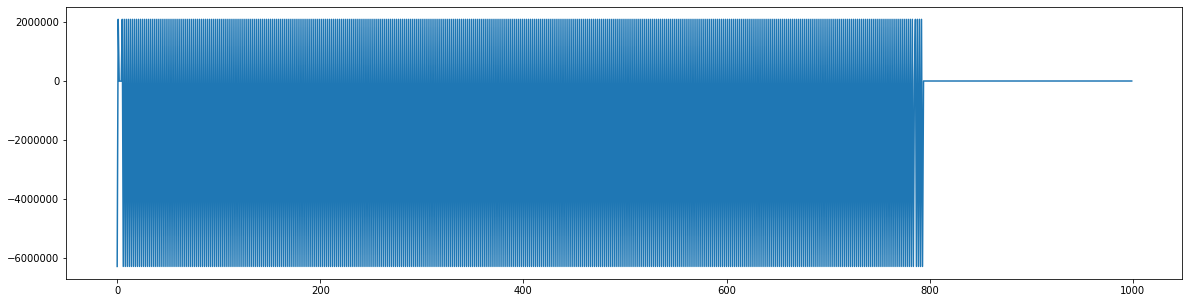

In [16]:
plt.plot(tokenized_data[:1000])

In [17]:
tokenized_data[793:900]

array([-6291456,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4096,
           4096,     4096,     4096,     4096,     4096,     4

In [18]:
initial_stage_index = 793

In [19]:
train_dataset = pd.DataFrame(data=np.c_[train_set[initial_stage_index:-1], train_set[initial_stage_index+1:], delta[initial_stage_index:], tokenized_data[initial_stage_index:]], columns=["t", "t+1", "delta", "tokenized_data"])
train_dataset.head()

,t,t+1,delta,tokenized_data
0,104289271808,104282980352,-6291456,-6291456
1,104282980352,104282984448,4096,4096
2,104282984448,104282988544,4096,4096
3,104282988544,104282992640,4096,4096
4,104282992640,104282996736,4096,4096


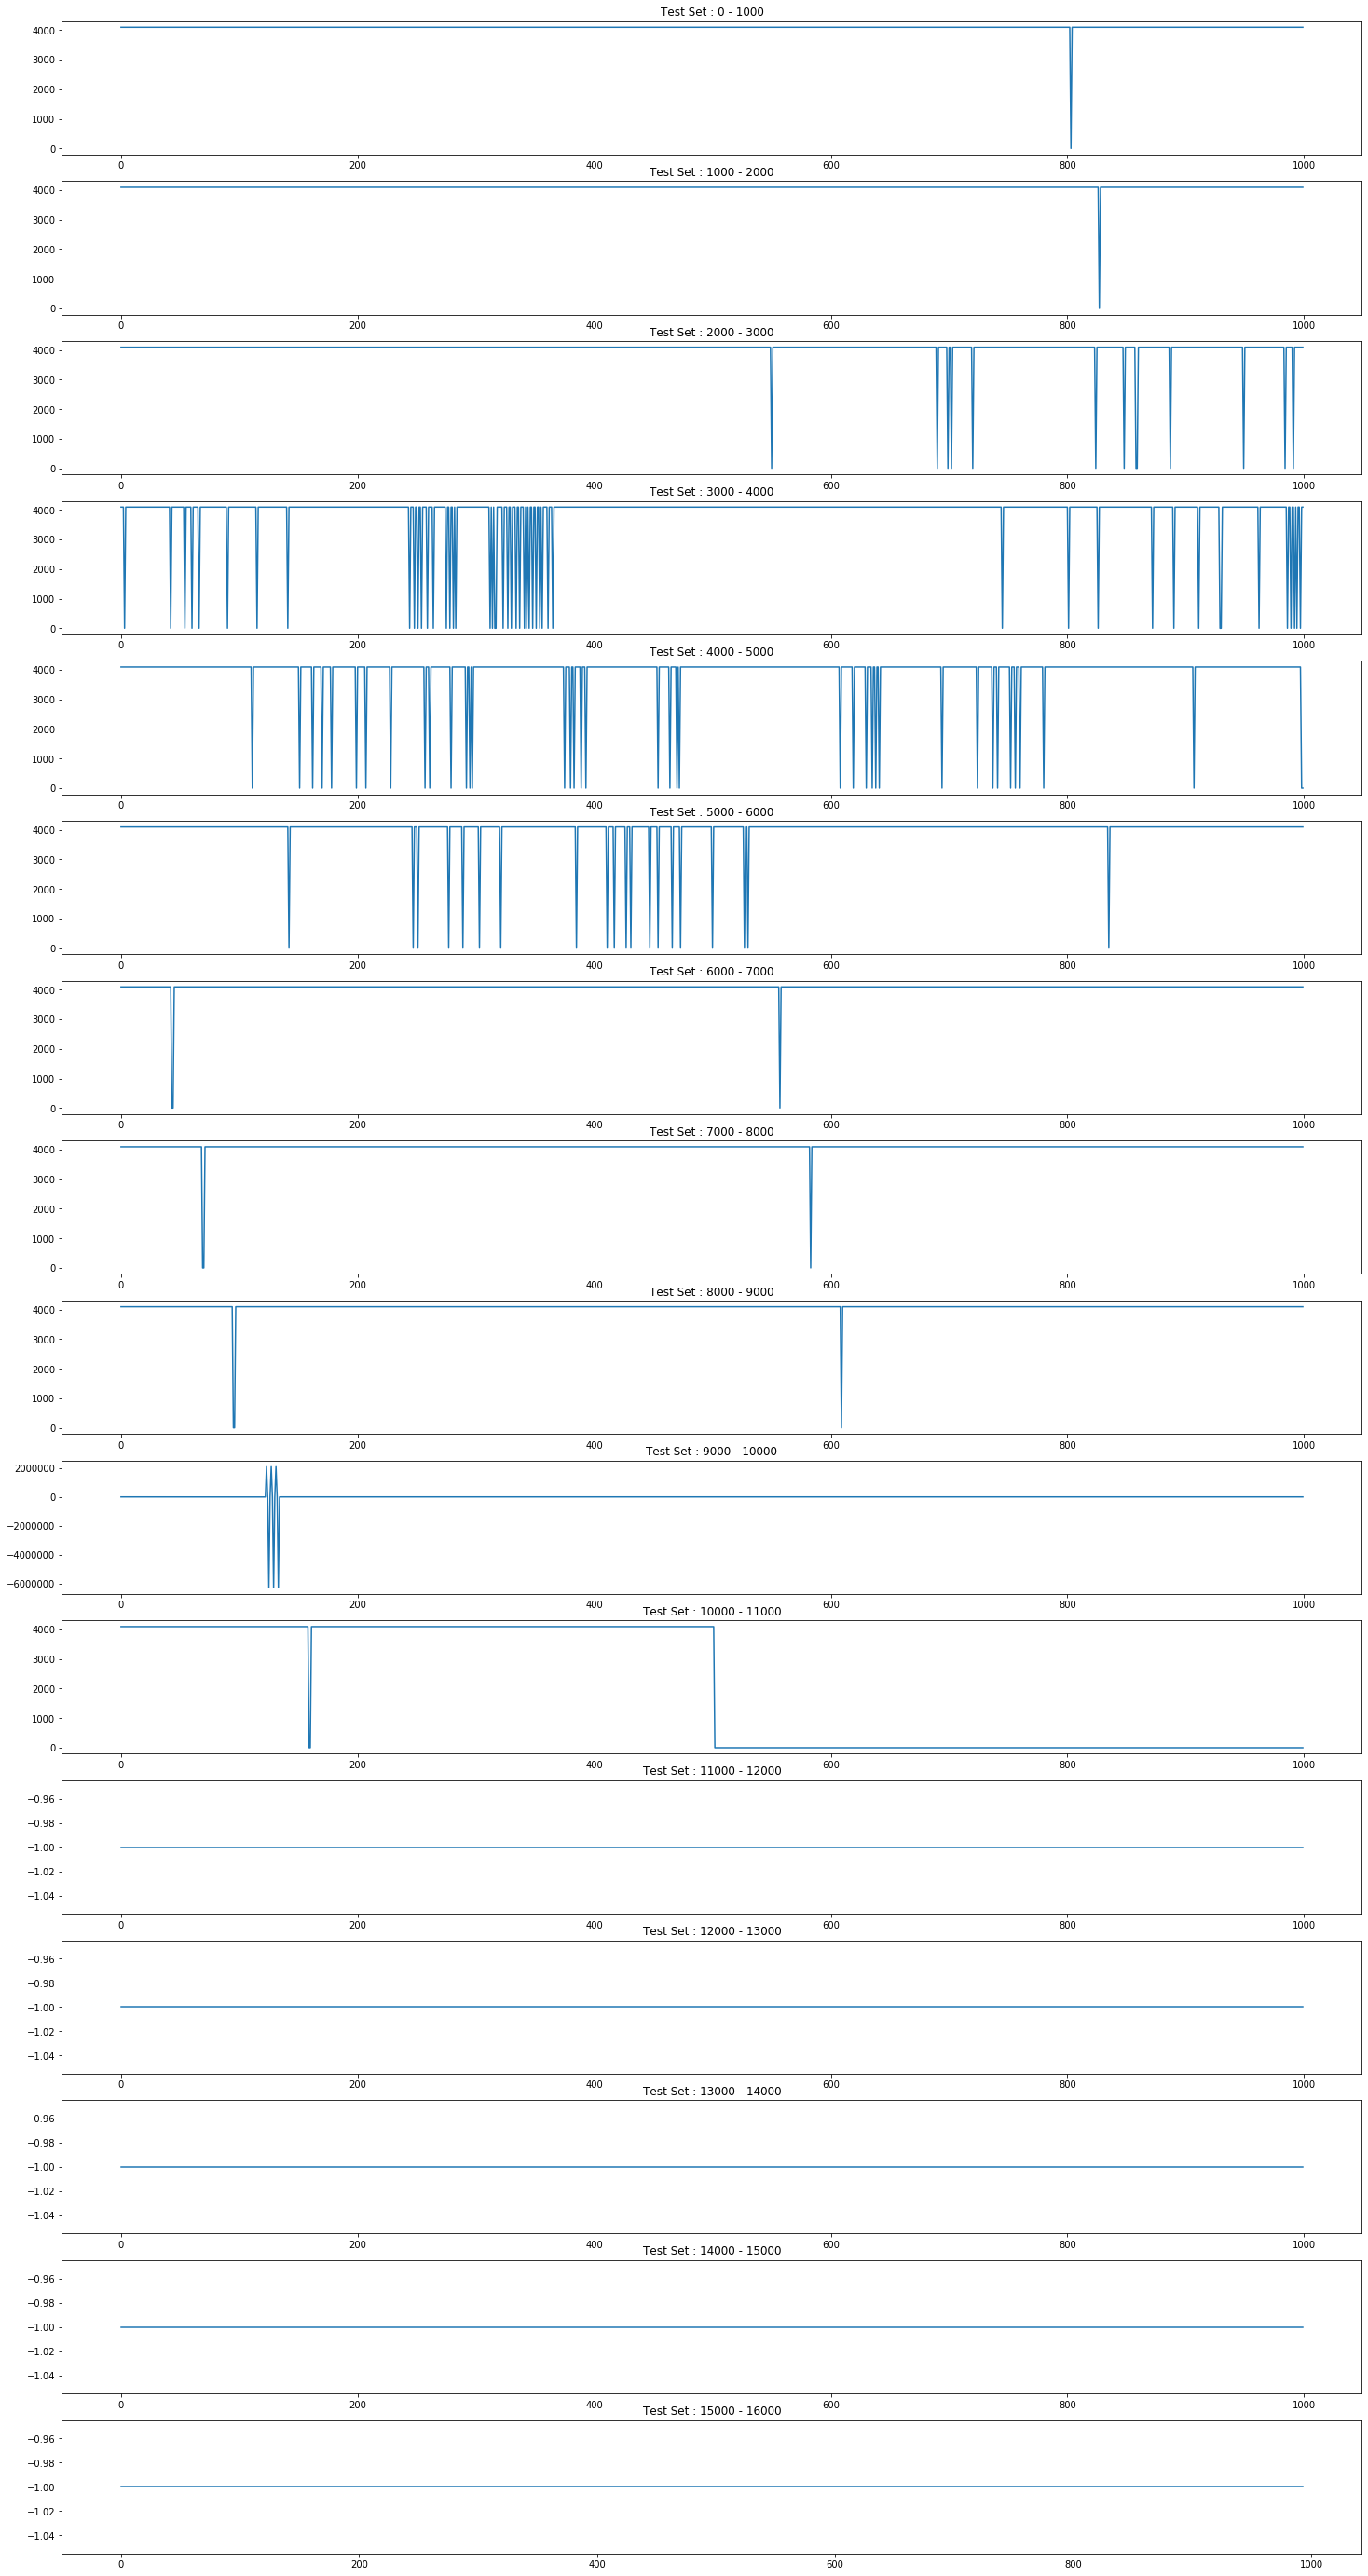

In [20]:
plt.figure(figsize=(25, 50))
num_test_chunk = 16
for i in range(num_test_chunk):
        ax = plt.subplot(num_test_chunk, 1, i+1)
        title = plt.title("Test Set : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_test_data[i*1000:(i+1)*1000])

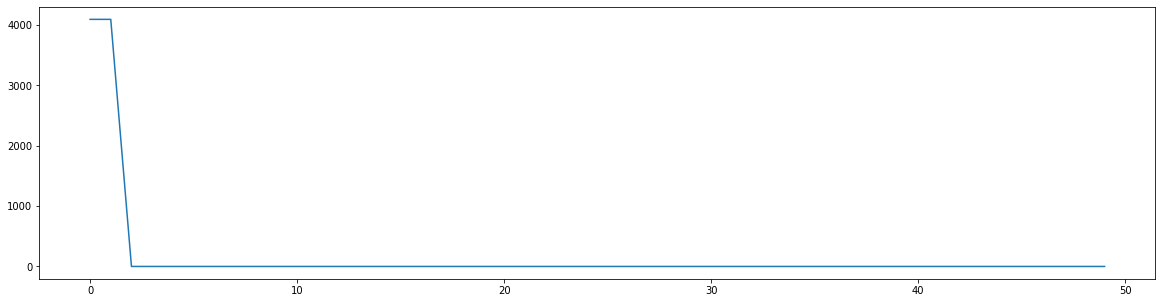

In [22]:
plt.plot(tokenized_test_data[10500:10550])

In [23]:
tokenized_test_data[10502:10550]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [24]:
terminal_stage_index = 10502

In [25]:
test_dataset = pd.DataFrame(data=np.c_[test_set[:terminal_stage_index], test_set[1:terminal_stage_index+1], test_delta[:terminal_stage_index], tokenized_test_data[:terminal_stage_index]], columns=["t", "t+1", "delta", "tokenized_data"])
test_dataset.head()

,t,t+1,delta,tokenized_data
0,103591821312,103591825408,4096,4096
1,103591825408,103591829504,4096,4096
2,103591829504,103591833600,4096,4096
3,103591833600,103591837696,4096,4096
4,103591837696,103591841792,4096,4096


train_dataset.to_csv("data/NU_train_set.csv", index=False)
test_dataset.to_csv("data/NU_test_set.csv", index=False)